In [1]:
# 데이터를 분석하는데 필요한 패키지 로드하기 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 
pd.set_option('display.float_format', '{:,.2f}'.format)

# 데이터 불러오기
raw_df1 = pd.read_csv('분석용.csv', encoding='UTF-8') ## 인코딩 설정하지 않으면 에러 발생

# 복사본 만들기 
df1 = raw_df1.copy()

In [2]:
# df1과 df2의 변수 목록 출력
df1_variables = df1.columns.tolist()
print("df1의 변수:", df1_variables)

df1의 변수: ['기준연도', '시군명', '연령대', '성별', '결제건수', '결제금액', '결제취소건수', '결제취소금액', '1회평균결제금액', '총인구', '총인구_남', '총인구_여', '내국인_세대수', '내국인_총인구', '내국인_남', '내국인_여', '등록외국인_총인구', '등록외국인_남', '등록외국인_여', '관광객수', '총결제건수(연도별)', '총결제금액(연도별)', '외국인 비율', '결제건수 비율', '결제금액 비율', '관광객 비율', '인구 대비 관광객 수', '결제취소건수 비율', '결제취소금액 비율', '월별신규가입자수(명)', '월별충전액(만원)', '신규가입자수 비율', '2024개수', '2022개수', '증가분', 'cluster', 'pca_x', 'pca_y']


In [3]:
# # 군집별 특징

# # 시각화할 데이터와 플롯의 개수
# plot_titles = [
#     '결제건수',
#     '결제금액',
#     '총인구',
#     '외국인 비율',
#     '결제건수 비율',
#     '결제금액 비율',
#     '관광객 비율',
#     '결제취소건수 비율', 
#     '결제취소금액 비율',
#     '2024개수',
#     '2022개수',
#     '증가분',
#     '신규가입자수 비율'
# ]

# # 서브플롯 개수 설정
# num_plots = len(plot_titles)

# # 서브플롯 배열의 행과 열 개수 설정
# ncols = 2  # 2열로 설정
# nrows = (num_plots + ncols - 1) // ncols  # 행 개수 계산

# # 서브플롯 생성
# fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 5 * nrows))
# axs = axs.flatten()  # axs를 1D 배열로 평탄화

# # 서브플롯 데이터와 그래프 그리기
# for i, title in enumerate(plot_titles):
#     if i >= len(axs):  # 서브플롯이 부족할 경우
#         break
#     ax = axs[i]
    
#     # 군집별로 해당 데이터의 평균을 계산
#     cluster_data = df1.groupby('cluster')[title].mean().reset_index()
    
#     # 가로 막대 그래프 시각화
#     sns.barplot(x=title, y='cluster', data=cluster_data, palette='viridis', ax=ax, orient='h')
#     ax.set_title(f'군집별 {title}')
#     ax.set_xlabel(title)
#     ax.set_ylabel('군집')

# # 레이아웃 조정
# plt.tight_layout()
# plt.show()

C:\Users\kimbomi\AppData\Local\Temp\ipykernel_5816\1832729300.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='결제건수', y='cluster', data=cluster_data, palette='viridis', ax=ax, orient='h')


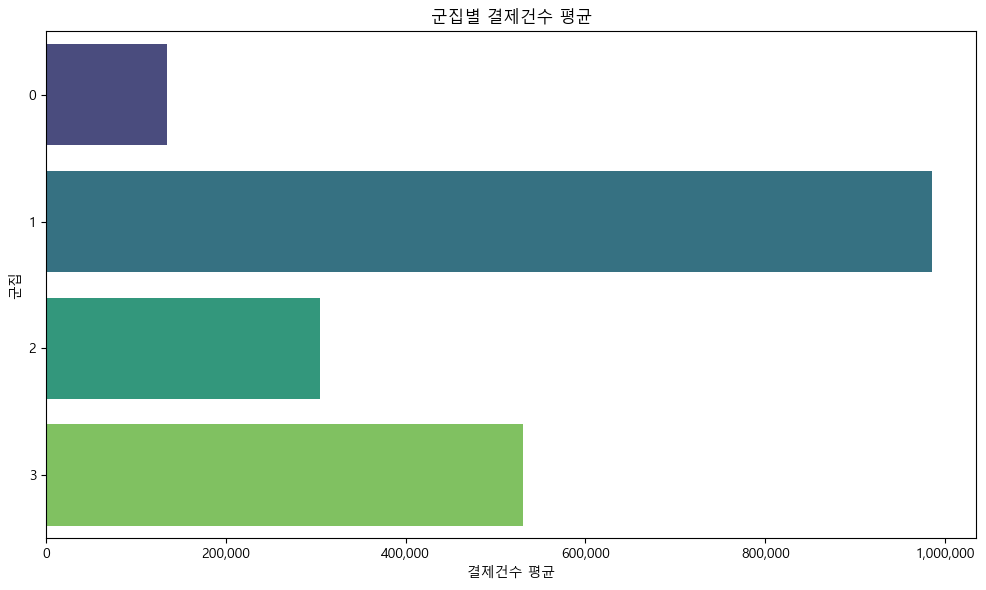

In [4]:
# 군집별 결제건수 평균 계산
cluster_data = df1.groupby('cluster')['결제건수'].mean().reset_index()

# 서브플롯 생성
fig, ax = plt.subplots(figsize=(10, 6))

# 가로 막대 그래프 시각화
sns.barplot(x='결제건수', y='cluster', data=cluster_data, palette='viridis', ax=ax, orient='h')
ax.set_title('군집별 결제건수 평균')
ax.set_xlabel('결제건수 평균')
ax.set_ylabel('군집')

# 축의 숫자 형식을 일반 숫자로 변경
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# 레이아웃 조정
plt.tight_layout()
plt.show()